In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [50]:
df_16 = pd.read_csv("../data/county_2016_preprocessed1.csv")

# encode dem/gop wins
df_16 = df_16.dropna()
df_16['DEM'] = df_16['DEM'].astype('int32')
df_16['GOP'] = df_16['GOP'].astype('int32')

df_16['DEMWin']=0
for idx, row in df_16.iterrows():
    if row['DEM'] >= row['GOP']:
        df_16['DEMWin'][idx]=1

# df_16['DEMWin']=df_16['DEM'] - df_16['GOP']

df_16['MedianIncome'] = df_16['MedianIncome'].replace(',','', regex=True)
df_16['MedianIncome'] = df_16['MedianIncome'].astype('int32')

df_16.head()

<ipython-input-50-6dbbe978d694>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,FIPS,County,DEM,GOP,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate,State,zip,primary_city,latitude,longitude,estimated_population,DEMWin
0,1001,Autauga,5908,18110,54487,5.3,12.2,10.0,27.7,5.1,AL,36003.0,Autaugaville,32.43,-86.65,1628.0,0
1,1003,Baldwin,18409,72780,56460,21.5,11.2,9.8,31.3,5.3,AL,31034.0,Hardwick,32.99,-83.29,1741.0,0
2,1005,Barbour,4848,5431,32884,-18.2,10.6,10.8,12.2,8.3,AL,26238.0,Volga,39.06,-80.11,698.0,0
3,1007,Bibb,1874,6733,43079,-0.8,12.1,10.8,11.5,6.4,AL,31052.0,Lizella,32.76,-83.86,7592.0,0
4,1009,Blount,2150,22808,47213,-1.0,12.2,11.2,12.6,5.4,AL,35013.0,Allgood,33.90,-86.51,0.0,0


In [51]:
df_12 = pd.read_csv("../data/county_2012_preprocessed1.csv")

# encode dem/gop wins
df_12 = df_12.dropna()
df_12['DEM'] = df_12['DEM'].astype('int32')
df_12['GOP'] = df_12['GOP'].astype('int32')

df_12['DEMWin']=0
for idx, row in df_12.iterrows():
    if row['DEM'] >= row['GOP']:
        df_12['DEMWin'][idx]=1

df_12['MedianIncome'] = df_12['MedianIncome'].replace(',','', regex=True)
df_12['MedianIncome'] = df_12['MedianIncome'].astype('int32')

df_12.head()

<ipython-input-51-ed23f149f7f6>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,FIPS,County,DEM,GOP,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate,State,zip,primary_city,latitude,longitude,estimated_population,DEMWin
0,1001,Autauga,6354,17366,51441,-6.1,11.1,10.2,21.9,6.9,AL,36003.0,Autaugaville,32.43,-86.65,1628.0,0
1,1003,Baldwin,18329,65772,48867,17.6,11.1,10.0,28.6,7.5,AL,31034.0,Hardwick,32.99,-83.29,1741.0,0
2,1005,Barbour,5873,5539,30287,-6.8,11.0,10.7,13.6,11.5,AL,26238.0,Volga,39.06,-80.11,698.0,1
3,1007,Bibb,2200,6131,37392,-3.8,10.8,10.5,10.2,8.5,AL,31052.0,Lizella,32.76,-83.86,7592.0,0
4,1009,Blount,2961,20741,44225,-1.6,12.4,10.3,12.3,6.9,AL,35013.0,Allgood,33.90,-86.51,0.0,0


In [52]:
y_all_16 = df_16['DEMWin'].tolist()
pos_class = np.sum(y_all_16) / len(y_all_16)
neg_class = 1 - pos_class

pos_class, neg_class

(0.14852459016393443, 0.8514754098360655)

In [53]:
def weighted_accuracy(pred, true):
    assert(len(pred) == len(true))
    num_labels = len(true)
    num_pos = sum(true)
    num_neg = num_labels - num_pos
    frac_pos = num_pos/num_labels
    weight_pos = 1/frac_pos
    weight_neg = 1/(1-frac_pos)
    num_pos_correct = 0
    num_neg_correct = 0
    for pred_i, true_i in zip(pred, true):
        num_pos_correct += (pred_i == true_i and true_i == 1)
        num_neg_correct += (pred_i == true_i and true_i == 0)
    weighted_accuracy = ((weight_pos * num_pos_correct) 
                         + (weight_neg * num_neg_correct))/((weight_pos * num_pos) + (weight_neg * num_neg))
    return weighted_accuracy

In [54]:
# normal x
x_16 = df_16.loc[:,"MedianIncome":"UnemploymentRate"]
x_16.head()

,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate
0,54487,5.3,12.2,10.0,27.7,5.1
1,56460,21.5,11.2,9.8,31.3,5.3
2,32884,-18.2,10.6,10.8,12.2,8.3
3,43079,-0.8,12.1,10.8,11.5,6.4
4,47213,-1.0,12.2,11.2,12.6,5.4


In [55]:
# normalize columns
for i, c in enumerate(x_16.columns): 
    x_16[c] = (x_16[c]-x_16[c].mean()) / x_16[c].std()
x_16.head()

,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate
0,0.402334,0.401981,0.239021,-0.293702,0.675324,-0.056617
1,0.557411,1.631638,-0.167636,-0.365196,1.063329,0.052022
2,-1.295646,-1.381779,-0.411630,-0.007724,-0.995255,1.681600
3,-0.494326,-0.061037,0.198355,-0.007724,-1.070700,0.649534
4,-0.169397,-0.076218,0.239021,0.135265,-0.952143,0.106341


In [56]:
# additional features
y_12 = df_12[['DEMWin']]
df_change = df_16.loc[:,"MedianIncome":"UnemploymentRate"] - df_12.loc[:,"MedianIncome":"UnemploymentRate"]
df_change = df_change.rename(columns={"MedianIncome": "MedianIncomeChange", "MigraRate": "MigraRateChange", "BirthRate": "BirthRateChange", "DeathRate": "DeathRateChange", "BachelorRate": "BachelorRateChange", "UnemploymentRate": "UnemploymentRateChange"})
x_16_add = pd.concat([df_16.loc[:,"MedianIncome":"UnemploymentRate"], df_change, y_12], axis=1)
x_16_add = x_16_add.rename(columns={"DEMWin": "DEMWin12"})
x_16_add.head()

,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate,MedianIncomeChange,MigraRateChange,BirthRateChange,DeathRateChange,BachelorRateChange,UnemploymentRateChange,DEMWin12
0,54487,5.3,12.2,10.0,27.7,5.1,3046,11.4,1.1,-0.2,5.8,-1.8,0
1,56460,21.5,11.2,9.8,31.3,5.3,7593,3.9,0.1,-0.2,2.7,-2.2,0
2,32884,-18.2,10.6,10.8,12.2,8.3,2597,-11.4,-0.4,0.1,-1.4,-3.2,1
3,43079,-0.8,12.1,10.8,11.5,6.4,5687,3.0,1.3,0.3,1.3,-2.1,0
4,47213,-1.0,12.2,11.2,12.6,5.4,2988,0.6,-0.2,0.9,0.3,-1.5,0


In [57]:
# normalize columns
for i, c in enumerate(x_16_add.columns): 
    x_16_add[c] = (x_16_add[c]-x_16_add[c].mean()) / x_16_add[c].std()
x_16_add.head()

,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate,MedianIncomeChange,MigraRateChange,BirthRateChange,DeathRateChange,BachelorRateChange,UnemploymentRateChange,DEMWin12
0,0.402334,0.401981,0.239021,-0.293702,0.675324,-0.056617,-0.516812,0.576326,0.748550,-0.542400,2.067022,0.466768,-0.519314
1,0.557411,1.631638,-0.167636,-0.365196,1.063329,0.052022,0.919488,0.127665,0.048885,-0.542400,0.589540,0.242528,-0.519314
2,-1.295646,-1.381779,-0.411630,-0.007724,-0.995255,1.681600,-0.658641,-0.787604,-0.300948,-0.353436,-1.364550,-0.318071,1.924987
3,-0.494326,-0.061037,0.198355,-0.007724,-1.070700,0.649534,0.317423,0.073826,0.888483,-0.227459,-0.077710,0.298588,-0.519314
4,-0.169397,-0.076218,0.239021,0.135265,-0.952143,0.106341,-0.535133,-0.069746,-0.161015,0.150469,-0.554318,0.634948,-0.519314


In [58]:
len(x_16_add), len(y_all_16)

(3050, 3050)

#### Model 1: kNNs

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# fit data
x_trainval, x_test, y_trainval, y_test = train_test_split(x_16, y_all_16, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=0.2, random_state=42)

max_val_acc = 0
max_k = 0
val_accuracy = []
for k in range(1,51):
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_val)
    val_acc = accuracy_score(predictions, y_val)
    val_accuracy.append(val_acc)
    
    if val_acc > max_val_acc:
        max_val_acc = val_acc
        max_k = k

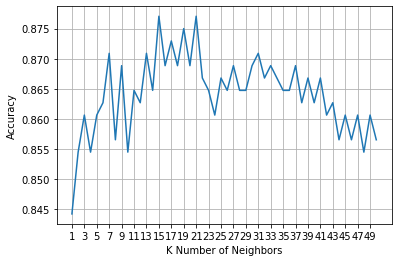

In [60]:
plt.plot(range(1,51),val_accuracy)
plt.xticks(range(1,51,2),range(1,51,2))
plt.xlabel("K Number of Neighbors")
plt.ylabel("Accuracy")
plt.grid()

In [61]:
model = KNeighborsClassifier(max_k)
model.fit(x_trainval, y_trainval)
predictions = model.predict(x_test)
print(max_k)
print(accuracy_score(predictions, y_test))
print(weighted_accuracy(y_test, predictions))

15
0.9114754098360656
0.8935414383432222


In [62]:
# fit data
x_trainval, x_test, y_trainval, y_test = train_test_split(x_16_add, y_all_16, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=0.2, random_state=42)

max_val_acc = 0
max_k = 0
val_accuracy = []
for k in range(1,51):
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_val)
    val_acc = accuracy_score(predictions, y_val)
    val_accuracy.append(val_acc)
    
    if val_acc > max_val_acc:
        max_val_acc = val_acc
        max_k = k

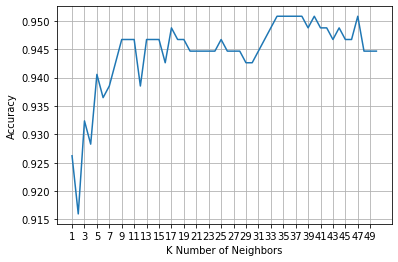

In [63]:
plt.plot(range(1,51),val_accuracy)
plt.xticks(range(1,51,2),range(1,51,2))
plt.xlabel("K Number of Neighbors")
plt.ylabel("Accuracy")
plt.grid()

In [64]:
model = KNeighborsClassifier(max_k)
model.fit(x_trainval, y_trainval)
predictions = model.predict(x_test)
print(max_k)
print(accuracy_score(predictions, y_test))
print(weighted_accuracy(y_test, predictions))

34
0.9491803278688524
0.8916584199241299


In [65]:
pred_probs = model.predict_proba(x_test)

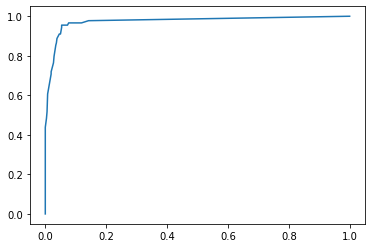

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, pred_probs[:,1])
plt.plot(fpr, tpr)
plt.show()

In [67]:
auc(fpr, tpr)

0.9741422070780048

#### Model 2: Decision Trees

In [68]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

max_val_acc = 0
best_max_depth = 0
val_accuracy = []
for k in range(1,31):
    # k fold validation
    kfold = model_selection.KFold(n_splits=50, shuffle=True, random_state=7)
    model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=k)
    results = model_selection.cross_val_score(model, x_trainval, y_trainval, cv=kfold)
    result_mean = results.mean()
    val_accuracy.append(result_mean)
    
    if result_mean > max_val_acc:
        max_val_acc = result_mean
        best_max_depth = k

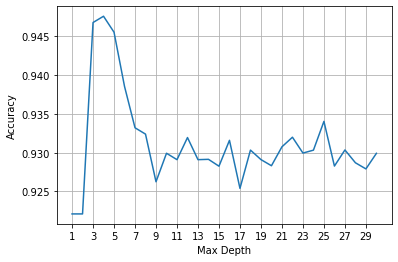

In [69]:
plt.plot(range(1,31),val_accuracy)
plt.xticks(range(1,31,2),range(1,31,2))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid()

In [70]:
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=best_max_depth)
model.fit(x_trainval, y_trainval)
predictions = model.predict(x_test)
print(best_max_depth)
print(accuracy_score(predictions, y_test))
print(weighted_accuracy(y_test, predictions))

4
0.9524590163934427
0.8979465611083622


In [71]:
pred_probs = model.predict_proba(x_test)
pred_probs

array([[1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       ...,
       [0.125, 0.875],
       [1.   , 0.   ],
       [1.   , 0.   ]])

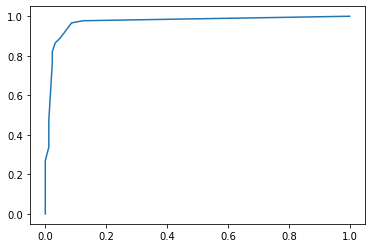

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, pred_probs[:,1])
plt.plot(fpr, tpr)
plt.show()

In [73]:
auc(fpr, tpr)

0.9703681338825508

#### Model 3: Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

scoring = {
            'accuracy': make_scorer(accuracy_score),
            'weighted_average': make_scorer(weighted_accuracy)
          }

parameters = {
    "max_depth": np.arange(1, 21),
    "n_estimators": np.arange(1, 51)
#     "max_features":["auto", "log2","sqrt"],
#     "criterion": ["friedman_mse", "mse", "mae"],
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(), parameters, scoring=scoring, refit=False, cv=None, n_jobs=-1)

clf.fit(x_trainval, y_trainval)

df=pd.DataFrame.from_dict(clf.cv_results_)
df # takes too long to run gdi my laptop gonna die

KeyboardInterrupt: 

In [ ]:
df.columns

In [125]:
max_idx_1 = df['mean_test_accuracy'].argmax()
# max_idx_2 = df['mean_test_weighted_average'].argmax()

In [137]:
df['params'][max_idx_1] #, df['params'][max_idx_2]

{'max_depth': 3, 'n_estimators': 21}

In [139]:
model = GradientBoostingClassifier(n_estimators=21, max_depth=3, random_state=7)
model.fit(x_trainval, y_trainval)
predictions = model.predict(x_test)
print(accuracy_score(predictions, y_test))
print(weighted_accuracy(y_test, predictions))

0.9508196721311475
0.8936126724578437


In [140]:
pred_probs = model.predict_proba(x_test)
pred_probs

array([[0.98051146, 0.01948854],
       [0.98051146, 0.01948854],
       [0.98051146, 0.01948854],
       ...,
       [0.26233287, 0.73766713],
       [0.98051146, 0.01948854],
       [0.98051146, 0.01948854]])

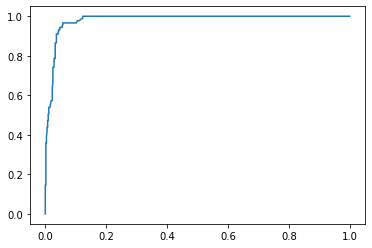

In [141]:
fpr, tpr, thresholds = roc_curve(y_test, pred_probs[:,1])
plt.plot(fpr, tpr)
plt.show()

In [142]:
auc(fpr, tpr)

0.9814854752097306

#### Model 4: EBMs

In [74]:
from interpret import show
from interpret.data import ClassHistogram

hist = ClassHistogram().explain_data(x_trainval, y_trainval, name = 'Train Data')
show(hist)

<!-- http://127.0.0.1:7001/5016811504/ -->

In [75]:
from interpret.glassbox import ExplainableBoostingClassifier, LogisticRegression, ClassificationTree, DecisionListClassifier

ebm = ExplainableBoostingClassifier(random_state=42)
ebm.fit(x_trainval, y_trainval)

ExplainableBoostingClassifier(feature_names=['MedianIncome', 'MigraRate',
                                             'BirthRate', 'DeathRate',
                                             'BachelorRate', 'UnemploymentRate',
                                             'MedianIncomeChange',
                                             'MigraRateChange',
                                             'BirthRateChange',
                                             'DeathRateChange',
                                             'BachelorRateChange',
                                             'UnemploymentRateChange',
                                             'DEMWin12'],
                              feature_types=['continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                           

In [76]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7001/5030121232/ -->

In [77]:
ebm_local = ebm.explain_local(x_test, y_test, name='EBM')
show(ebm_local)

<!-- http://127.0.0.1:7001/5020421088/ -->

In [78]:
from interpret.perf import ROC

ebm_perf = ROC(ebm.predict_proba).explain_perf(x_test, y_test, name='EBM')
show(ebm_perf)

<!-- http://127.0.0.1:7001/5020443360/ -->

In [79]:
from interpret.glassbox import LogisticRegression, ClassificationTree

lr = LogisticRegression(random_state=42, feature_names=feature_names, penalty='l1', solver='liblinear')
lr.fit(x_trainval, y_trainval)

tree = ClassificationTree()
tree.fit(x_trainval, y_trainval)

In [80]:
lr_perf = ROC(lr.predict_proba).explain_perf(x_test, y_test, name='Logistic Regression')
tree_perf = ROC(tree.predict_proba).explain_perf(x_test, y_test, name='Classification Tree')

show(lr_perf)
show(tree_perf)
show(ebm_perf)

<!-- http://127.0.0.1:7001/5016904704/ -->

<!-- http://127.0.0.1:7001/5020443696/ -->

<!-- http://127.0.0.1:7001/5020443360/ -->

In [81]:
lr_global = lr.explain_global(name='Logistic Regression')
tree_global = tree.explain_global(name='Classification Tree')

show(lr_global)

<!-- http://127.0.0.1:7001/5016675040/ -->

In [82]:
show(tree_global)

<!-- http://127.0.0.1:7001/5016677968/ -->

In [83]:
show(ebm_global)

<!-- http://127.0.0.1:7001/5030121232/ -->

In [48]:
show([hist, lr_global, lr_perf, tree_global, tree_perf, ebm_global, ebm_perf], share_tables=True)

<!-- http://127.0.0.1:7001/5028171328/ -->
 Open in new window